In [2]:
import os
import glob
import pydicom
import numpy as np
import pandas as pd
from pathlib import Path
from scipy import ndimage
from cv2 import resize
from auxillary.mask_functions import rle2mask


labels = pd.read_csv("/home/jahan/Downloads/siim-train-test/train-rle.csv")
ids = labels.ImageId.values
rles = labels[' EncodedPixels'].values
path = "/home/jahan/Downloads/siim-train-test/dicom-images-train"
save_path = '/media/jahan/solo/cxr_data/'

# USE IF NEEDING TO LABEL AS PTx or NOT
#labels = pd.read_csv("/Users/jahanpd/Downloads/pneumothorax/train-rle.csv")
#normal = []
#for n in range(len(labels)):
#    if "-1" in str(labels[" EncodedPixels"].values[n]):
#        normal.append(labels["ImageId"].values[n])

paths = []

count = [0,1,1]
for filename in Path(path).glob('**/*.dcm'):
    paths.append(str(filename))

total = np.array(())
ptx = np.array(())
masks = np.array(())
norm = np.array(())

for idx in range(len(ids)):
    # get the ID of the filname and find its index in the labels array
    filename = [s for s in paths if ids[idx] in s]
    ds = pydicom.dcmread(filename[0]) # extract array
    array = ds.pixel_array
    
    # resize image
    small = resize(array, (256,256))
    
    count[0] += 1 # keep track of size of arrays
    total = np.append(total, small)
    
    if ("-1" in rles[idx]):
        count[1] += 1
        norm = np.append(norm, small)
    
    else:
        count[2] += 1
        ptx = np.append(ptx, small)
        mask = rle2mask(rles[idx],1024,1024)
        mask = resize(mask, (256,256))
        masks = np.append(masks, mask)
            
    # save total
    if total.nbytes > 512*1000*1000:
        print(total.nbytes/(1000*1000))
        rows = int(len(total)/(256*256))
        np.savez_compressed(save_path+str(int(count[0]/512))+'.npz',
                            a=total.reshape((rows,256,256)))
                    
        total = np.array(())
    
    # save normal
    if norm.nbytes > 512*1000*1000:
        rows = int(len(norm)/(256*256))
        np.savez_compressed(save_path+"labelled/norm/"+str(int(count[1]/512))+'.npz',
                            a=norm.reshape((rows,256,256)))
                    
        norm = np.array(())
                            
    # save ptx
    if ptx.nbytes > 512*1000*1000:
        rows = int(len(ptx)/(256*256))
        np.savez_compressed(save_path+'labelled/ptx/'+str(int(count[2]/512))+'.npz',
                            a=ptx.reshape((rows,256,256)),
                            b=masks.reshape((rows,256,256)))
                    
        ptx = np.array(())
        masks = np.array(())

rows = int(len(total)/(256*256))
np.savez_compressed(save_path+str((count[0]/512))+'.npz',
                            a=total.reshape((rows,256,256)))

rows = int(len(norm)/(256*256))
np.savez_compressed(save_path+'labelled/norm/'+str((count[1]/512))+'.npz',
                            a=norm.reshape((rows,256,256)))

rows = int(len(ptx)/(256*256))
np.savez_compressed(save_path+'labelled/ptx/'+str((count[2]/512))+'.npz',
                            a=ptx.reshape((rows,256,256)),
                            b=masks.reshape((rows,256,256)))

fx.close()
fy.close()
print(count)

KeyboardInterrupt: 

In [2]:
x = np.loadtxt(save_path+'x.csv',delimiter=",")
print(x[1])

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
from matplotlib import pyplot as plt

pixels = np.array(x[1], dtype='float').reshape((1512,1512))
plt.imshow(pixels, cmap='gray')

plt.show()

(320, 360)


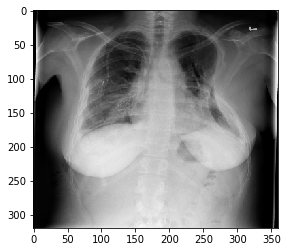

In [8]:
from cv2 import resize

ds = pydicom.dcmread(paths[0])
array = ds.pixel_array
rotated = resize(array, (360,320))
print(rotated.shape)
from matplotlib import pyplot as plt

plt.imshow(rotated, cmap='gray')

plt.show()

In [4]:
labels = pd.read_csv("/home/jahan/Downloads/siim-train-test/train-rle.csv")

In [69]:
ptx = labels[labels[' EncodedPixels'] != " -1"]

In [70]:
from auxillary.mask_functions import rle2mask

test = rle2mask(labels[' EncodedPixels'][2],1024,1024)

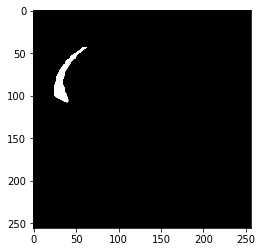

In [71]:
from matplotlib import pyplot as plt

plt.imshow(resize(test, (256,256)), cmap='gray')

plt.show()

In [96]:
paths[1].split("/")[-1][0:-4]

'1.2.276.0.7230010.3.1.4.8323329.4029.1517875180.735654.'

In [82]:
labels['ImageId'].values[0]

'1.2.276.0.7230010.3.1.4.8323329.5597.1517875188.959090'

In [85]:
np.where(labels['ImageId'].values == '1.2.276.0.7230010.3.1.4.8323329.5597.1517875188.959090')[0][0]

0

In [90]:
1028%512

4